### LOAD & INSPECT

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv (r"C:\Users\vghat\Desktop\VinayPython\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DATA CLEANING

In [12]:
#Fix TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [13]:
#Check missing values:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df = df.dropna()


### TARGET & BASIC METRICS

In [15]:
#Overall churn rate
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

### EXPLORATORY ANALYSIS

In [16]:
#Churn by Contract Type
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [17]:
#Churn vs Tenure
df.groupby("Churn")["tenure"].mean()


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [18]:
#Churn by Internet Service
df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [19]:
#Monthly Charges impact
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

### VISUALS

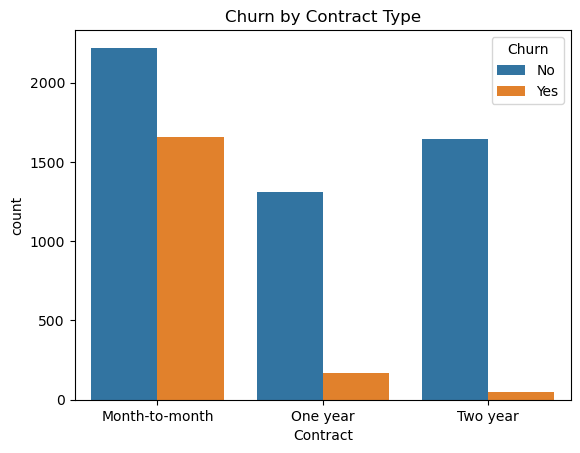

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()
